<a href="https://colab.research.google.com/github/Kuriajm/Week_9_Core_IP-/blob/main/Moringa_School_Data_Science_Core_IP_Wk_9_K_NN_Mk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic survival prediction using K Nearest Neighbors**

##**1. Business understanding**

**1.1 Define the question**

Using the K-Nearest Neighbour algorithm, perform survival prediction given the Titanic dataset.

   **Tasks** 

1. Randomly partition each dataset into two parts i.e 80 - 20  sets.
2. For dataset 1, because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.
3. Compute the accuracy (percentage of correct classification).
4. Report the confusion matrix of each classifier.
5. Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.
6. Suggest and apply at least one of the optimization techniques that you learned earlier this week.
7. Provide further recommendations to improve both classifiers.


**1.2 Metric for success**

A model that is able to predict  with accuracy of 95% and above

**1.3 Context**

We are working with the data provided and all the limitations that comes with it. 

**1.4 Experimental design**

1. Define the question, the metric for success, the context, experimental design taken.

2. Data Understanding

3. Data Preparation

4. Explalatory Data analysis

5. Feature Engineering

6. K-NN

7. Challenging the Solution

8. Reccomendations and Conclusion

##**2. Data understanding**

**2.1 Prelimineries**

In [81]:
#Importing the libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

**2.2 Loading the dataset**

In [82]:
#Loading both our Datasets 
train = pd.read_csv('https://archive.org/download/train5_202002/train%20%285%29.csv')
test = pd.read_csv('https://archive.org/download/test1_202002/test%20%281%29.csv')

**2.3 Exploring the 'train' dataset**

In [83]:
#Read the first 5 rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
#Describing the data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [85]:
#Shape of data
train.shape

(891, 12)

**2.4 Exploring the 'test' dataset**

In [86]:
#Read the first 5 rows
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [87]:
#Checking the info

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB




> The data need to be prepared before we run the classifier algorithim 

**Categorical features**
Nominal: Cabin, Embarked #more than one category, but not ordered
Dichotomous: sex         #has only two possible outcomes
Ordinal: Pclass          #more than one category, but has an intrinsic order

**Numerical Features**
Discrete: Passenger ID,SibSp,Parch,Survived 
Continuous: Age, Fare



##**3. Data preparation**

**3.1 Cleaning the data**

In [88]:
# Identifying the Missing Data
print("=== Train Set ===")
print(train.isnull().sum())
print('\n')
print("=== Test Set ===")
print(test.isnull().sum())

=== Train Set ===
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


=== Test Set ===
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64




> The train dataset has 177 null values on age, 2 null on embark and 687 missing data on Cabin.



> Test data has 86 age missing, 1 fare and 327 cabin missing.



In [89]:
#Dealing with missing values. We start with fare because it has only one missing on test
test_df = test.loc[test.Fare.isnull(), 'Pclass'].values[0]
median_fare = test.loc[test.Pclass==test_df, 'Fare'].median()
test.loc[test.Fare.isnull(), 'Fare'] = median_fare


Missing ages

To fill in the missing ages, we can do something more clever then just take the overal median age. The names contain titles of which some are linked to their age. Master is a younger boy (in general). Lets take the median of each age group.

In [90]:
# Select everything before the . as title
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=True)
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [91]:
#Specifying the titles
title_reduction = {'Mr': 'Mr', 'Mrs': 'Mrs', 'Miss': 'Miss', 
                   'Master': 'Master', 'Don': 'Mr', 'Rev': 'Rev',
                   'Dr': 'Dr', 'Mme': 'Miss', 'Ms': 'Miss',
                   'Major': 'Mr', 'Lady': 'Mrs', 'Sir': 'Mr',
                   'Mlle': 'Miss', 'Col': 'Mr', 'Capt': 'Mr',
                   'Countess': 'Mrs','Jonkheer': 'Mr',
                   'Dona': 'Mrs'}
train['Title'] = train['Title'].map(title_reduction)
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Dr'], dtype=object)

In [92]:
#Filling with median of every title
for title, age in train.groupby('Title')['Age'].median().iteritems():
    print(title, age)
    train.loc[(train['Title']==title) & (train['Age'].isnull()), 'Age'] = age

Dr 46.5
Master 3.5
Miss 21.5
Mr 30.0
Mrs 35.0
Rev 46.5


In [93]:
# Select everything before the . as title
test['Title'] = test['Name'].str.extract('([A-Za-z]+)\.', expand=True)
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [94]:
#Specifying the titles
title_reduction = {'Mr': 'Mr', 'Mrs': 'Mrs', 'Miss': 'Miss', 
                   'Master': 'Master', 'Don': 'Mr', 'Rev': 'Rev',
                   'Dr': 'Dr', 'Mme': 'Miss', 'Ms': 'Miss',
                   'Major': 'Mr', 'Lady': 'Mrs', 'Sir': 'Mr',
                   'Mlle': 'Miss', 'Col': 'Mr', 'Capt': 'Mr',
                   'Countess': 'Mrs','Jonkheer': 'Mr',
                   'Dona': 'Mrs'}
test['Title'] =test['Title'].map(title_reduction)
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Dr'], dtype=object)

In [95]:
#Filling with median of every title
for title, age in test.groupby('Title')['Age'].median().iteritems():
    print(title, age)
    test.loc[(test['Title']==title) & (test['Age'].isnull()), 'Age'] = age

Dr 53.0
Master 7.0
Miss 22.0
Mr 29.0
Mrs 37.0
Rev 35.5




> Since over 70% of Cabin Data is missing we will drop the column


> For Embarked we will fill it with the most common value





In [96]:
#Fill embarked with the most common value
train = train[train['Embarked'].notna()]
#Drop cabin
train = train.drop(['Cabin'], axis = 1) 
#Drop cabin on test
test = test.drop(['Cabin'], axis = 1) 


In [97]:
print(train.isnull().sum())
print("********")

print(test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64
********
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64


In [98]:
#Removing columns that won't be necessary in this study
train_set = train.drop(['PassengerId','Name', 'Ticket'], axis = 1) 
test_set = test.drop(['PassengerId','Name', 'Ticket'], axis = 1)

print("=== Train Set ===")
print(train_set.columns)
print('\n')
print("=== Test Set ===")
print(test_set.columns)

=== Train Set ===
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')


=== Test Set ===
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title'], dtype='object')


##**4.0 Exploratory Data Analysis**

**4.1 Univariate Analysis**

In [99]:
# Ploting the univariate summaries and recording our observations
def uni_stats(train_set):
  out_df = pd.DataFrame(columns=['Count', 'Nulls', 'Unique', 'Mode', 'Mean', 'Min','25%', 'Median', '75%', 'Max', 'Std_dev', 'Skew', 'Kurt' ])


  for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
      out_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].mode().values[0], df[col].mean(), df[col].min(), 
                         df[col].quantile(0.25), df[col].median(), df[col].quantile(0.75), df[col].max(), df[col].std(), df[col].skew(), df[col].kurt()]

    else:
     out_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(),df[col].mode().values[0],'-', '-', '-', '-', 
                        '-', '-', '-', '-', '-']

  return out_df

uni_stats(train_set)

,Count,Nulls,Unique,Mode,Mean,Min,25%,Median,75%,Max,Std_dev,Skew,Kurt
Survived,340.0,0.0,1.0,1,1,1,1,1,1,1,0,0,0
Pclass,340.0,0.0,3.0,1,1.95588,1,1,2,3,3,0.862763,0.0851412,-1.65408
Sex,340.0,0.0,2.0,female,-,-,-,-,-,-,-,-,-
Age,340.0,0.0,67.0,35,27.9696,0.42,21,28,35,80,13.9796,0.189968,0.260336
SibSp,340.0,0.0,5.0,0,0.476471,0,0,0,1,4,0.709838,1.95015,5.41499
Parch,340.0,0.0,5.0,0,0.467647,0,0,0,1,5,0.773156,1.74589,3.54558
Fare,340.0,0.0,152.0,13,48.2095,0,12.4437,26,56.9469,512.329,66.7488,3.86703,20.6313
Embarked,340.0,0.0,3.0,S,-,-,-,-,-,-,-,-,-
Title,340.0,0.0,5.0,Miss,-,-,-,-,-,-,-,-,-


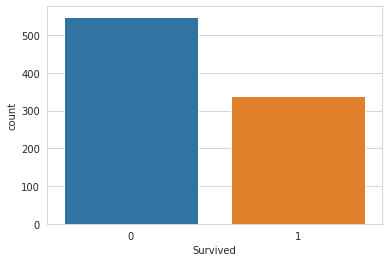

In [100]:
#Lets see the percentage that survived

sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train_set)



> Majority of people on-board the Titanic lost their lives.



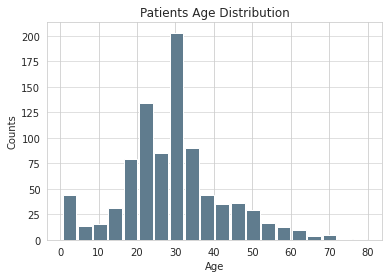

In [101]:
#visualizing age dirstibution
size, scale = 1000, 10
age = train_set['Age']

age.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Patients Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)



> Here we conclude that most passangers on board were between the ages of 25 and 40. Its also important to note that since we replaced missing age values with median it shows by the longest bar on thie chart.



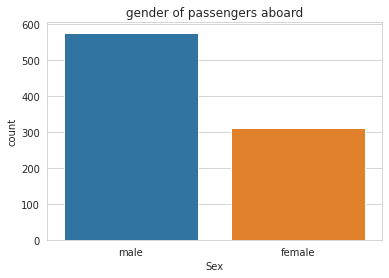

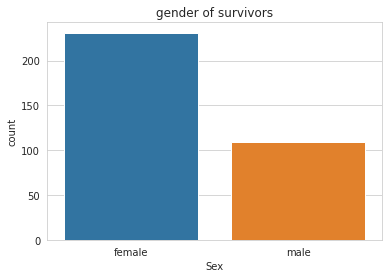

In [102]:
#Passangers on-board per gender
sns.countplot(train_set.Sex)
plt.title("gender of passengers aboard")
plt.show()
df = train_set[(train_set.Survived == 1)]
sns.countplot(df.Sex)
plt.title("gender of survivors")
plt.show()



> Despite having most males onboard the titanic as passangers, The number of females who survived were many than the male. That explains women were given priority in evacuation.



**4.2 Bivariate Analysis**

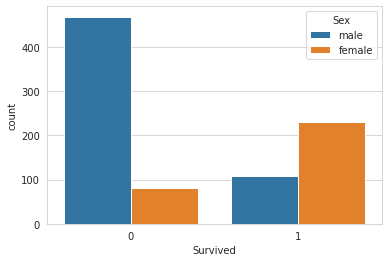

In [103]:
#Survival by gender
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train_set)



> Many males did not make it



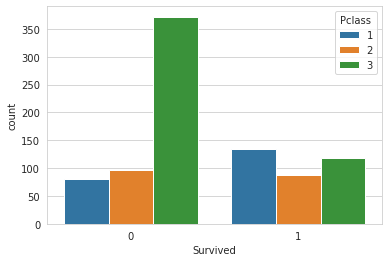

In [104]:
sns.countplot(x='Survived', hue='Pclass', data=train_set)



> Many people from third class did not make it. This explains the priority was given to first class while evacuating.



<Figure size 432x288 with 0 Axes>

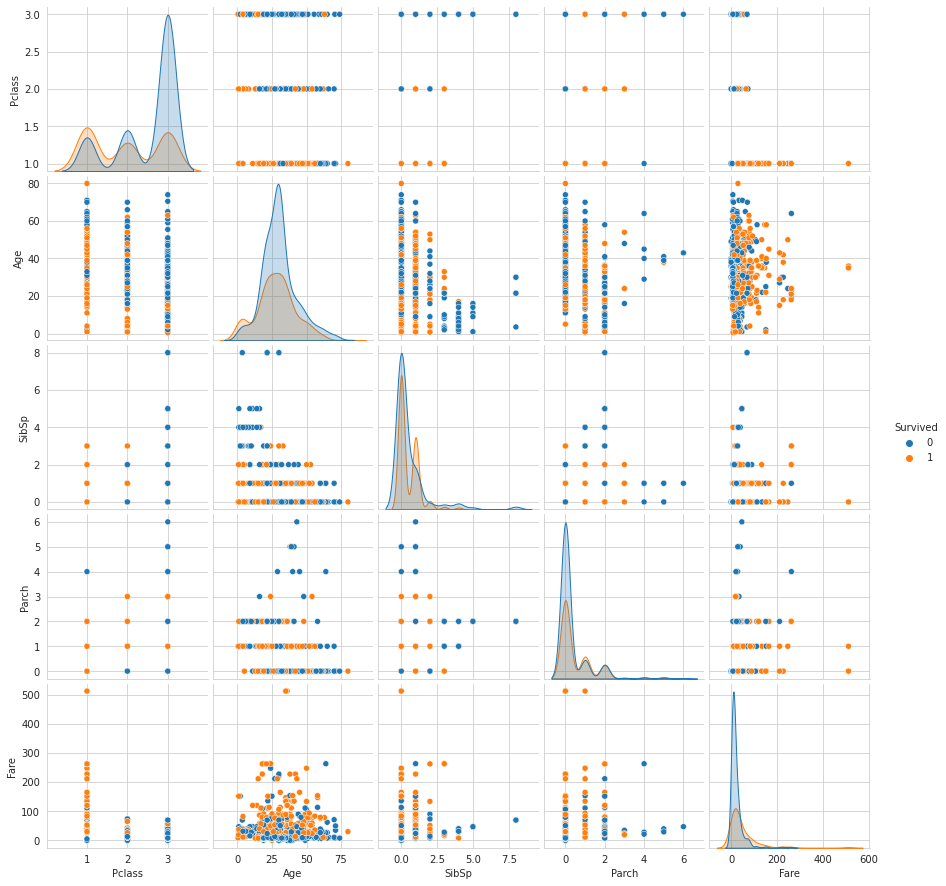

In [105]:
# Plot the pairplot
plt.figure()
sns.pairplot(train_set, hue='Survived')
plt.show()

This plots confirm what we had said earlier about survival and pclass. We can also see that since fare was charged in relation to class and distance, those who had paid more survived.

In [106]:
#Correlations
train_set.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.083060,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.350041,0.081656,0.016824,-0.548193
Age,-0.083060,-0.350041,1.000000,-0.264370,-0.187358,0.094753
SibSp,-0.034040,0.081656,-0.264370,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.187358,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.094753,0.160887,0.217532,1.000000


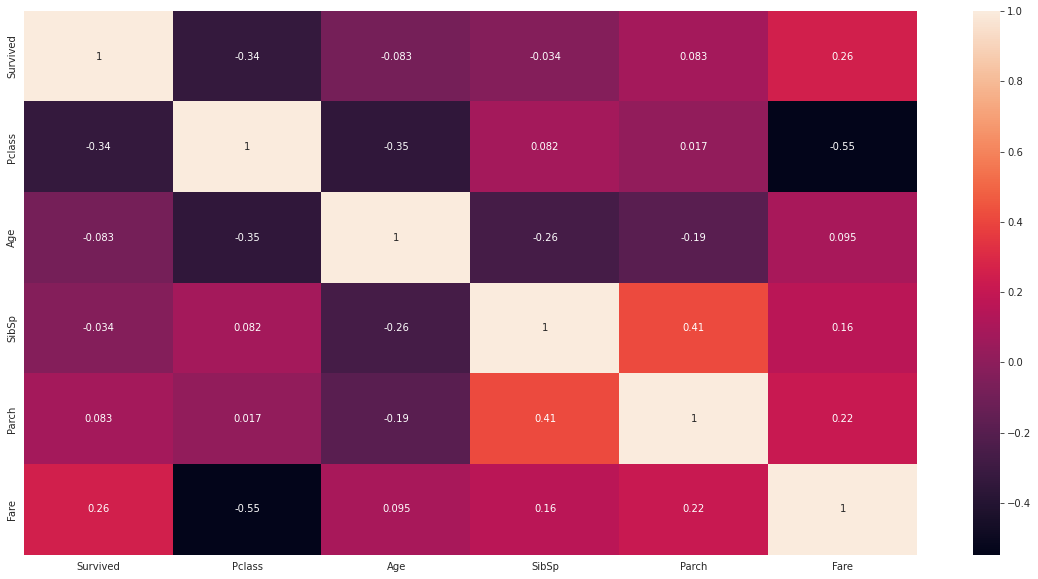

In [107]:
#correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(train_set.corr(),annot=True)
plt.show()


Pclass has negative correlation with survived. Because Pclass 3 is the lowest fare class, and this class was the crowded one, and survive rate was pretty low.

Also, Fare has negative correlation with Pclass, this is because Pclass 3 is the cheapest class.


# **5.0 Feature engeniering**

In [108]:
test_set.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,34.5,0,0,7.8292,Q,Mr
1,3,female,47.0,1,0,7.0000,S,Mrs
2,2,male,62.0,0,0,9.6875,Q,Mr
3,3,male,27.0,0,0,8.6625,S,Mr
4,3,female,22.0,1,1,12.2875,S,Mrs


In [109]:
train_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [111]:
#Drop Title
train_set1 = train_set.drop(['Title'], axis = 1) 
test_set1 = test_set.drop(['Title'], axis = 1)

**5.1 Lebel Encode**

*Sex: male = 1 and female = 0*

*Embarked: S = 2, Q = 1 and C = 0*

In [112]:
#Encoding using label encoder
from sklearn.preprocessing import LabelEncoder

train_data = train_set1.apply(LabelEncoder().fit_transform)
train_data.head()
test_data = test_set1.apply(LabelEncoder().fit_transform)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,44,0,0,24,1
1,2,0,60,1,0,5,2
2,1,1,74,0,0,41,1
3,2,1,34,0,0,34,2
4,2,0,27,1,1,46,2


In [114]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,30,1,0,18,2
1,1,0,0,53,1,0,207,0
2,1,2,0,36,0,0,41,2
3,1,0,0,49,1,0,189,2
4,0,2,1,49,0,0,43,2


**5.2 Scalling our dataset**

In [115]:
#Separate features from target
X = train_data.iloc[:, 1:8].values
y = train_data.iloc[:, 0].values
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train using 80% of the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape

((711, 7), (711,))

# **6.0 K-NN Modeling**

In [116]:
from sklearn.neighbors import KNeighborsClassifier
#Create KNN Object.
knn = KNeighborsClassifier()

#Training the model.
model = knn.fit(X_train, y_train)

#Predict test data set.
y_pred = model.predict(X_test)

#Checking performance our model with confusion matrix.
from sklearn.metrics import confusion_matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')

#Checking performance our model with classification report.
from sklearn.metrics import classification_report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

#Checking performance our model with ROC Score.
from sklearn.metrics import roc_auc_score
print('\n')
print("=== ROC Score ===")
roc_auc_score(y_test, y_pred)

=== Confusion Matrix ===
[[85 20]
 [29 44]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       105
           1       0.69      0.60      0.64        73

    accuracy                           0.72       178
   macro avg       0.72      0.71      0.71       178
weighted avg       0.72      0.72      0.72       178



=== ROC Score ===


0.7061317677756034



> *Our ROC_AUC Score is 70.61%. Also from the confusion matrixour model doesn't perform so well, as predicts 29 passengers who actually survived as not survived and 20 who did not survive as survived.. We will thus, tune hyperparameters to improve our model perfomance*



# **7.0 Challenging the solution**

**7.1 Hyperparameter tuning**

In [117]:
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2,3]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
model_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(model_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 14


In [118]:
knn_2 = KNeighborsClassifier(leaf_size=1, n_neighbors=14, p=1)

#Training the model.
model_2 = knn_2.fit(X_train, y_train)

#Predict test data set.
y2_pred = model.predict(X_test)

#Checking performance our model with confusion matrix.
from sklearn.metrics import confusion_matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y2_pred))
print('\n')

#Checking performance our model with classification report.
from sklearn.metrics import classification_report
print("=== Classification Report ===")
print(classification_report(y_test, y2_pred))

#Checking performance our model with ROC Score.
from sklearn.metrics import roc_auc_score
print('\n')
print("=== ROC Score ===")
roc_auc_score(y_test, y2_pred)

=== Confusion Matrix ===
[[85 20]
 [29 44]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       105
           1       0.69      0.60      0.64        73

    accuracy                           0.72       178
   macro avg       0.72      0.71      0.71       178
weighted avg       0.72      0.72      0.72       178



=== ROC Score ===


0.7061317677756034



> Even after tuning, our model has not improved. Lets break it down to different optimization ratios and check performance



**7.3 70-30 Ratio**

In [119]:
# Train using 70% of the data.
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.3, random_state=0)
X1_train.shape, y1_train.shape

((622, 7), (622,))

In [120]:
knn_3 = KNeighborsClassifier(leaf_size=1, n_neighbors=14, p=1)

#Training the model.
model_3 = knn_3.fit(X1_train, y1_train)

#Predict test data set.
y3_pred = model.predict(X1_test)

#Checking performance our model with confusion matrix.
from sklearn.metrics import confusion_matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y1_test, y3_pred))
print('\n')

#Checking performance our model with classification report.
from sklearn.metrics import classification_report
print("=== Classification Report ===")
print(classification_report(y1_test, y3_pred))

#Checking performance our model with ROC Score.
from sklearn.metrics import roc_auc_score
print('\n')
print("=== ROC Score ===")
roc_auc_score(y1_test, y3_pred)

=== Confusion Matrix ===
[[135  22]
 [ 33  77]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       157
           1       0.78      0.70      0.74       110

    accuracy                           0.79       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



=== ROC Score ===


0.7799363057324841



> This model has a higher ROC Score of 77.99 but still has many misclassifications on the confusion matrix.



**7.4 60-40 Ratio**

In [121]:
# Train using 60% of the data.
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.4, random_state=0)
X2_train.shape, y2_train.shape

((533, 7), (533,))

In [122]:
knn_4 = KNeighborsClassifier(leaf_size=1, n_neighbors=14, p=1)

#Training the model.
model_4 = knn_4.fit(X2_train, y2_train)

#Predict test data set.
y4_pred = model.predict(X2_test)

#Checking performance our model with confusion matrix.
from sklearn.metrics import confusion_matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y2_test, y4_pred))
print('\n')

#Checking performance our model with classification report.
from sklearn.metrics import classification_report
print("=== Classification Report ===")
print(classification_report(y2_test, y4_pred))

#Checking performance our model with ROC Score.
from sklearn.metrics import roc_auc_score
print('\n')
print("=== ROC Score ===")
roc_auc_score(y2_test, y4_pred)

=== Confusion Matrix ===
[[189  27]
 [ 45  95]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       216
           1       0.78      0.68      0.73       140

    accuracy                           0.80       356
   macro avg       0.79      0.78      0.78       356
weighted avg       0.80      0.80      0.79       356



=== ROC Score ===


0.7767857142857143

# **8.0 Conclusion**

The model is at its best with 70 - 30 split. Though further scaling of data may help improve the model.